In [16]:
import networkx as nx
import freeman as fm
import matplotlib.pyplot as plt
from pprint import pprint
import pymysql
import sys
from collections import defaultdict, OrderedDict
import graph_tool as gt
from graph_tool import centrality, draw
import pandas as pd
import statsmodels.api as sm
import statsmodels
import math
import numpy as np

import pickle

from setup import mysql_setup

# Decada 00

In [4]:

with open("listas.pickle", "rb") as fp:
    list_60, list_70, list_80, list_90, list_00, list_10 = pickle.load(fp)
with open("infos.pickle", "rb") as fp:
    d = pickle.load(fp)
with open("infos2.pickle", "rb") as fp:
    d_60, d_70, d_80, d_90, d_00 = pickle.load(fp)
with open("d_00_1_listas.pickle", "rb") as fp:
    lista_l, lista_p, lista_d, lista_b, lista_c = pickle.load(fp)

In [5]:
for i in range(len(lista_c)):
    if math.isnan(lista_c[i]):
        lista_c[i] = 0

## Popularity x Degree

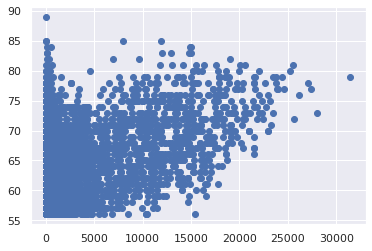

In [6]:
plt.scatter(lista_d, lista_p)
plt.show()

In [7]:
model_d = sm.OLS(lista_p, lista_d)
results_d = model_d.fit()
print(results_d.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.342
Model:                            OLS   Adj. R-squared (uncentered):              0.342
Method:                 Least Squares   F-statistic:                              2086.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):                        0.00
Time:                        14:46:49   Log-Likelihood:                         -21583.
No. Observations:                4018   AIC:                                  4.317e+04
Df Residuals:                    4017   BIC:                                  4.317e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Popularity x Betweenness

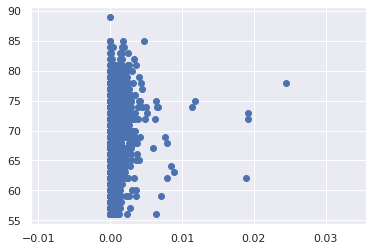

In [8]:
plt.scatter(lista_b, lista_p)
plt.show()

In [13]:
model_b = sm.OLS(lista_p, lista_b)
results_b = model_b.fit()
print(results_b.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.141
Model:                            OLS   Adj. R-squared (uncentered):              0.140
Method:                 Least Squares   F-statistic:                              657.7
Date:                Thu, 28 Nov 2019   Prob (F-statistic):                   1.79e-134
Time:                        14:50:20   Log-Likelihood:                         -22119.
No. Observations:                4018   AIC:                                  4.424e+04
Df Residuals:                    4017   BIC:                                  4.425e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/liu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



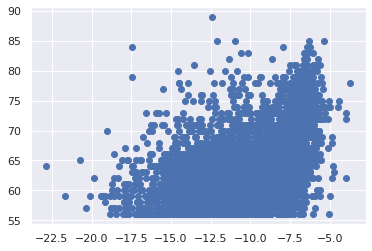

In [31]:
lista_b_log = np.log(lista_b)
lista_del = [0]
for i in range(len(lista_b_log)):
    if math.isnan(lista_b_log[i]) or math.isinf(lista_b_log[i]) :
        lista_del.append(i)
        
for j in reversed(lista_del):
    lista_b_log = np.delete(lista_b_log, j)
    lista_p = np.delete(lista_p, j)

plt.scatter(lista_b_log, lista_p)
plt.show()

In [32]:
model_b = sm.OLS(lista_p, lista_b_log)
results_b = model_b.fit()
print(results_b.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                          3.320e+04
Date:                Thu, 28 Nov 2019   Prob (F-statistic):                        0.00
Time:                        15:32:54   Log-Likelihood:                         -17432.
No. Observations:                3912   AIC:                                  3.487e+04
Df Residuals:                    3911   BIC:                                  3.487e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Popularity x Closeness

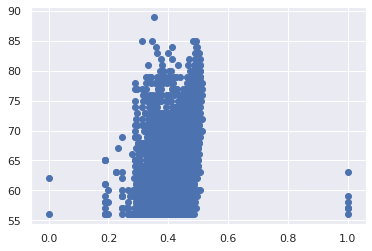

In [10]:
plt.scatter(lista_c, lista_p)
plt.show()

In [11]:
model_c = sm.OLS(lista_p, lista_c)
results_c = model_c.fit()
print(results_c.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                          1.727e+05
Date:                Thu, 28 Nov 2019   Prob (F-statistic):                        0.00
Time:                        14:46:50   Log-Likelihood:                         -14821.
No. Observations:                4018   AIC:                                  2.964e+04
Df Residuals:                    4017   BIC:                                  2.965e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------